# <center>  MOSFET Transistors characteristics  </center>
## <center>  by Omar Khater </center>

## Table of Contents
<ul>
<li><a href="#intro"> Introduction </a><br>
    <a href="#load"> Data Importing, Loading, and basic exploring </a><br>
    
<li><a href="#uni"> Univariate Exploration </a></li>
    <a href="#L_W"> Length and Width distributions </a><br>
    <a href="#I"> Current distribution in NMOS, PMOS devices </a><br>
    <a href="#GM"> Transconductance distribution in NMOS, PMOS devices </a><br>
    
<li><a href="#bi"> Bivariate Exploration </a></li>
    <a href="#W Vs L"> W Vs L </a><br>
    <a href="#GM VS ID "> $g_m$ vs $I_D$ </a><br>
    
<li><a href="#mul"> Multivariate Exploration </a></li>
    <a href="#ID Vs VGS"> $I_D$ Vs $V_{GS}$ at different L values </a><br>
    <a href="#GM Vs ID"> $g_m$ Vs $V_{GS}$ at different L values </a><br>
</ul>

<a id = 'intro'></a>
## Introduction

Transistors are considered as one of the most revolutionary inventions in the modern era. They laid the basis to evolve all modern technologies and computing devices such as computers. Major type of these devices is called **Metal Oxide Semi-conductor Field Effect Transistors (MOSFETs)** is of particular interest in modern on-chip fabrications. In-depth investigation to device characteristics using a dataset collected using advanced micro-electronics simulator called Spectre Provided by Cadence is performed in this document. Analog Electronics design implications will be the main focus in this analysis. Both MOSFET types (NMOS, PMOS ) will be compared throughout our analysis. The device used in this analysis is **BSIM3 models for a typical 180-nm CMOS process.** 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
pd.options.display.float_format = '{:,.2e}'.format
%matplotlib inline
from IPython.display import Image 

The Internal strucuture of MOSFET devices depends on layers doping type. Mainly, There are 2 types for MOSFETs ,namely, NMOS, PMOS. Simplified view for NMOS is shown below. PMOS is exactly the same with replacing n with P layers. 

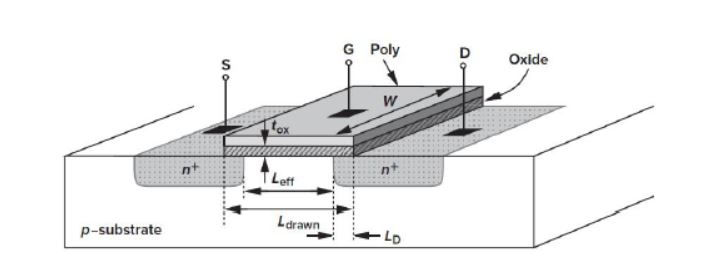

In [2]:
Image('MOSFET_Structure.JPG')

<a id = 'load'></a>
## Data Importing, Loading, and basic exploring

In [3]:
data = pd.read_csv('MOS_tb.csv', index_col = 0)
data.head()

,VGS,L,W,ID_NMOS,ID_PMOS,gm_NMOS,gm_PMOS,gds_NMOS,gds_PMOS,Vov_NMOS,Vstar_NMOS,Vov_PMOS,Vstar_PMOS
1,0.00e+00,1.00e-07,5.00e-07,5.86e-12,-3.01e-13,1.57e-10,7.65e-12,6.64e-12,8.57e-13,-5.21e-01,7.47e-02,6.29e-01,-7.85e-02
2,1.00e-02,1.00e-07,5.00e-07,7.66e-12,-3.88e-13,2.05e-10,9.88e-12,8.68e-12,1.11e-12,-5.11e-01,7.47e-02,6.19e-01,-7.85e-02
3,2.00e-02,1.00e-07,5.00e-07,1.00e-11,-5.00e-13,2.68e-10,1.27e-11,1.13e-11,1.43e-12,-5.01e-01,7.47e-02,6.09e-01,-7.85e-02
4,3.00e-02,1.00e-07,5.00e-07,1.31e-11,-6.45e-13,3.51e-10,1.64e-11,1.48e-11,1.84e-12,-4.91e-01,7.47e-02,5.99e-01,-7.85e-02
5,4.00e-02,1.00e-07,5.00e-07,1.71e-11,-8.32e-13,4.58e-10,2.12e-11,1.94e-11,2.37e-12,-4.81e-01,7.47e-02,5.89e-01,-7.85e-02


In [4]:
data.shape

(362, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 1 to 363
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   VGS         362 non-null    float64
 1   L           362 non-null    float64
 2   W           362 non-null    float64
 3   ID_NMOS     362 non-null    float64
 4   ID_PMOS     362 non-null    float64
 5   gm_NMOS     362 non-null    float64
 6   gm_PMOS     362 non-null    float64
 7   gds_NMOS    362 non-null    float64
 8   gds_PMOS    362 non-null    float64
 9   Vov_NMOS    362 non-null    float64
 10  Vstar_NMOS  362 non-null    float64
 11  Vov_PMOS    362 non-null    float64
 12  Vstar_PMOS  362 non-null    float64
dtypes: float64(13)
memory usage: 39.6 KB


Clearly, Data has no missing values. 

### Structure of the dataset.

> Different device characteristics has been extracted for a wide range of device dimensions range at different input voltages. Both MOSFETs ( P-MOS and NMOS) data are available. 

### Main features of interest in the dataset

> **Length (L)** : channel Length (Source to drain length).  
> **Width (W)** : Device Width  ( perpendicular dimension to device length)   
> **Control Voltage ($V_{GS}$)** : Device control voltage.  

### Features in the dataset that will help support our investigation

> **Current ($I_D$)** : The output signal result from MOSFET act.  
> **Transconductance (𝑔𝑚)** : Measures the device ability to amplify input signal.  


<a id = 'uni'></a>
## Univariate Exploration

<a id = 'L_W'></a>
### Length and Width distributions

<Figure size 432x288 with 0 Axes>

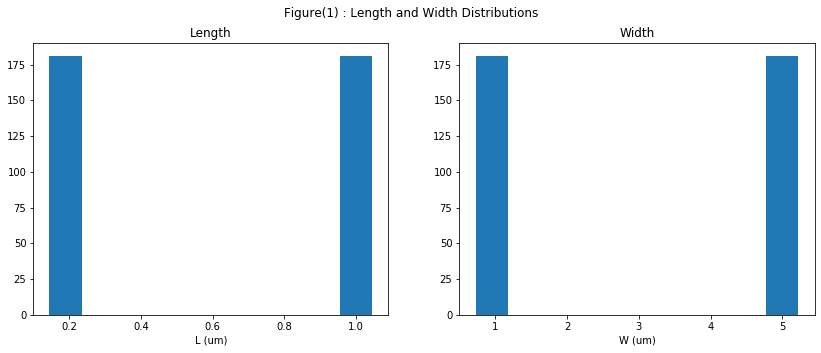

In [6]:
plt.figure();
fig1 , ax = plt.subplots(1,2);
fig1.set_size_inches(14,5);
fig1.suptitle('Figure(1) : Length and Width Distributions');

ax[0].hist(data.L / 1e-6 , align = 'right' );
ax[0].set_title('Length');
ax[0].set_xlabel('L (um)')

ax[1].hist(data.W /1e-6 , align = 'right' );
ax[1].set_title('Width');
ax[1].set_xlabel('W (um)');


It is evident from length, width distributions above that there are 4 different values for both values. This plot raise a question about **possible relationship between width and length**. But at this point, all we can confirm is that there are 2 different set of values for both L, W.   

<a id = 'I'></a>
### Current distribution in NMOS, PMOS devices

<Figure size 432x288 with 0 Axes>

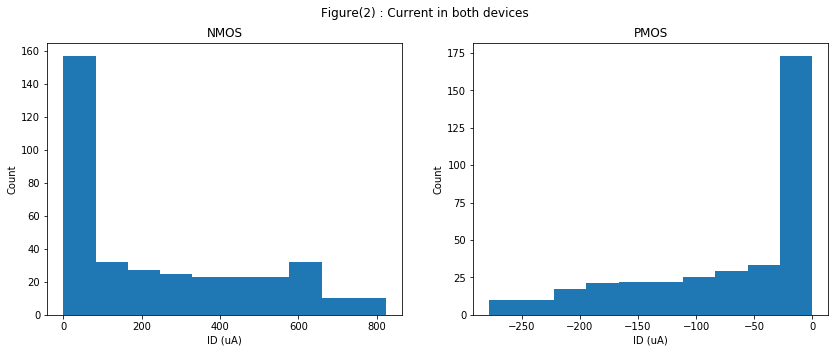

In [7]:
plt.figure()
fig2, ax2 = plt.subplots(1,2);
fig2.set_size_inches(14,5);

fig2.suptitle('Figure(2) : Current in both devices');

ax2[0].hist(data.ID_NMOS / 1e-6);
ax2[0].set_title('NMOS');
ax2[0].set_xlabel('ID (uA)');
ax2[0].set_ylabel('Count');
ax2[1].hist(data.ID_PMOS / 1e-6);
ax2[1].set_title('PMOS');
ax2[1].set_xlabel('ID (uA)');
ax2[1].set_ylabel('Count');

Interestingly, PMOS devices output current has opposite polarity to NMOS devices. This is an expected behaviour regarding device internal strucure. What is more important in this figure though is that maximum value for NMOS current roughly about 3 to 4 times corresponding PMOS value. This is due to the fact that electrons mobility to conduct current is about 3-4 times holes mobility which are the underhood mechanisms of conducting current in both NMOS, PMOS devices respectively.

<a id = 'GM'></a>
### Transconductance distribution in NMOS, PMOS devices

<Figure size 432x288 with 0 Axes>

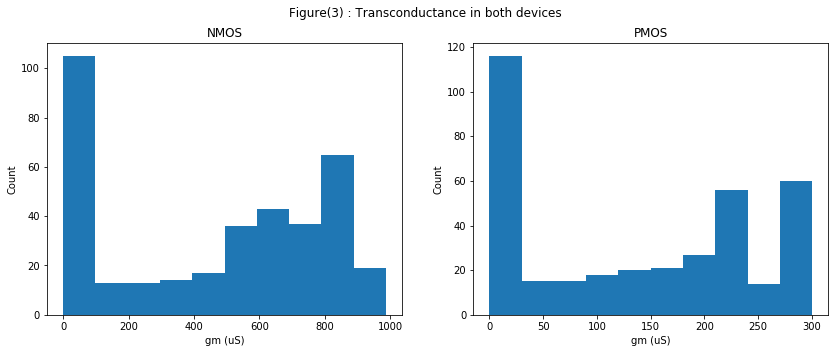

In [8]:
plt.figure()
fig3, ax3 = plt.subplots(1,2);
fig3.set_size_inches(14,5);

fig3.suptitle('Figure(3) : Transconductance in both devices');

ax3[0].hist(data.gm_NMOS / 1e-6);
ax3[0].set_title('NMOS');
ax3[0].set_xlabel('gm (uS)');
ax3[0].set_ylabel('Count');

ax3[1].hist(data.gm_PMOS / 1e-6);
ax3[1].set_title('PMOS');
ax3[1].set_xlabel('gm (uS)');
ax3[1].set_ylabel('Count');

Basically, transconductance is a measure of device ability to amplify input signal using output current. Noting the x axis relationship between NMOS, PMOS for gm, ID distributions,  **is there any correlation between gm, ID ?**

<a id = 'bi'></a>
## Bivariate Exploration

<a id = 'W Vs L'></a>
### W Vs L

Previously we raised a question about possible relation between L, W in this dataset. Let's further exploring it. 

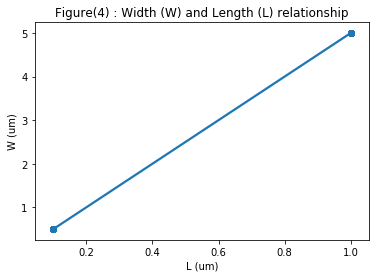

In [9]:
plt.figure();
plt.title('Figure(4) : Width (W) and Length (L) relationship');
sb.regplot(data = data, x = data.L / 1e-6, y = data.W /1e-6)
plt.xlabel('L (um)');
plt.ylabel('W (um)');

In [10]:
W_L_ratio_n = (data.W / data.L).nunique()
W_L_ratio = (data.W / data.L).unique()
print('There are {} total unique ratio between W, L in the dataset. They are {}'.format(W_L_ratio_n, W_L_ratio))

There are 2 total unique ratio between W, L in the dataset. They are [5. 5.]


It turns out that the data is gathered by sweeping device length using **2 values with constant width to length ratio**. From the regression line and calculation above, this ratio is equal to 5. This an important observation about the data that will used to compare 2 different models for MOSFETs. Namely, Short channel devices and Long-channel devices.

Let's extract Long-channel and short channel data

In [11]:
ShortChannel = data[ (data.L == .1e-6) & (data.W == .5e-6)]
LongChannel = data[ (data.L == 1e-6) & (data.W == 5e-6)]

<a id = 'GM VS ID'></a>
### $g_m$ vs $I_D$

In addition, another relation arises from ID, gm distributions above that worth exploration

<Figure size 432x288 with 0 Axes>

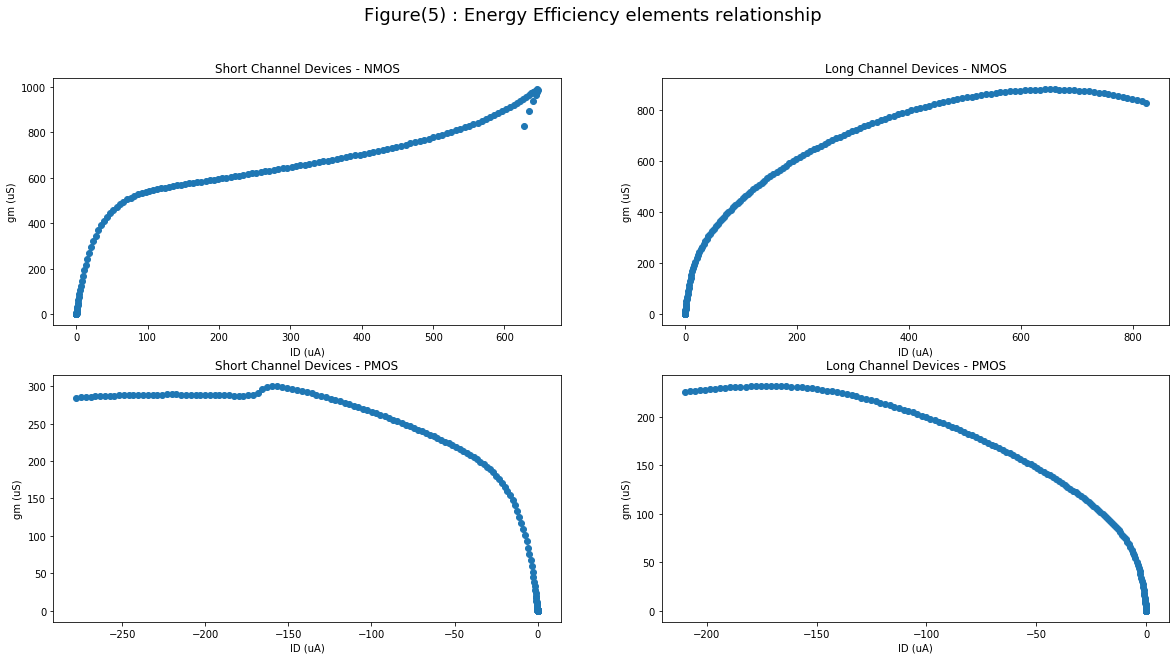

In [12]:
plt.figure()
fig5, ax5 = plt.subplots(2,2);
fig5.set_size_inches(20,10);

fig5.suptitle('Figure(5) : Energy Efficiency elements relationship', fontsize = 18);

ax5[0][0].scatter(ShortChannel.ID_NMOS / 1e-6, ShortChannel.gm_NMOS / 1e-6);
ax5[0][0].set_title('Short Channel Devices - NMOS');
ax5[0][0].set_ylabel('gm (uS)');
ax5[0][0].set_xlabel('ID (uA)');

ax5[1][0].scatter(ShortChannel.ID_PMOS / 1e-6, ShortChannel.gm_PMOS / 1e-6);
ax5[1][0].set_title('Short Channel Devices - PMOS');
ax5[1][0].set_ylabel('gm (uS)');
ax5[1][0].set_xlabel('ID (uA)');

ax5[0][1].scatter(LongChannel.ID_NMOS / 1e-6, LongChannel.gm_NMOS / 1e-6);
ax5[0][1].set_title('Long Channel Devices - NMOS');
ax5[0][1].set_ylabel('gm (uS)');
ax5[0][1].set_xlabel('ID (uA)');

ax5[1][1].scatter(LongChannel.ID_PMOS / 1e-6, LongChannel.gm_PMOS / 1e-6);
ax5[1][1].set_title('Long Channel Devices - PMOS');
ax5[1][1].set_ylabel('gm (uS)');
ax5[1][1].set_xlabel('ID (uA)');

A highly positive and negative correlations between gm, ID can be clearly observed for NMOS, PMOS respectively regardless of whether the device is a long channel or a short channel device. Infact, these both variables are of major interest when we study any MOSFET device. That's because they represent energy efficiency of this device. The ratio between both variables represents how much transconducatnce ( ability to amplify input signal) we can get from each micro-amp of current. 

Thus, the higher slope the higher energy efficiency. All 4 curvers has variable slopes for different gm values according to MOSFET **operation region or device Inversion layer strength**. Typical classification is ( Weak inversion (WI) , Moderate inversion ( MI) , Strong inversion (SI)) regions. 

Finally, It can be noted that **short channel** device efficiency **is lower** than **long channel** ones because of non-idealities caused by short channel effects such as channel length modulation , velocity saturation and mobility degradation. 

<a id = 'mul'></a>
## Multivariate Exploration

<a id = 'ID Vs VGS'></a>
### $I_D$ Vs $V_{GS}$ at different L values

One important relationship while studying MOSFET device is ID - VGS curve. Basically, VGS represent the control terminal over the whole device operation i.e. it determines whether the device is on or off. 

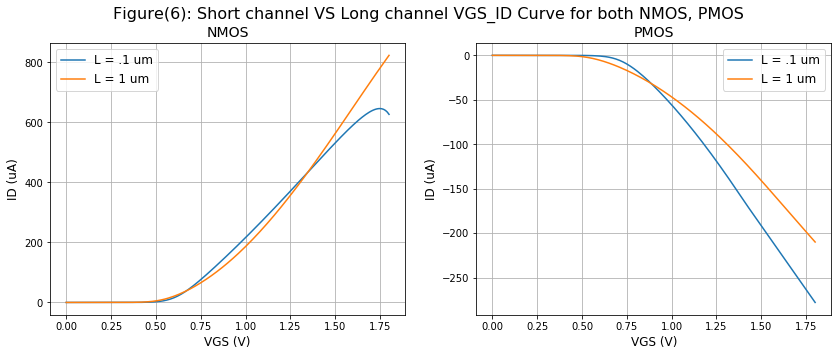

In [13]:
fig6, ax6 = plt.subplots(1, 2)
fig6.set_size_inches((14,5))
fig6.suptitle('Figure(6): Short channel VS Long channel VGS_ID Curve for both NMOS, PMOS', fontsize=16)

## Upper plot 
ax6[0].plot(ShortChannel.VGS,ShortChannel.ID_NMOS / 1e-6\
            ,LongChannel.VGS, LongChannel.ID_NMOS /1e-6);
ax6[0].set_title('NMOS',fontsize=14)
ax6[0].grid()

ax6[0].legend(['L = .1 um','L = 1 um '], fontsize=12)
ax6[0].set_xlabel('VGS (V)',fontsize=12);
ax6[0].set_ylabel('ID (uA)',fontsize = 12);

## Lower plot


ax6[1].plot(ShortChannel.VGS,ShortChannel.ID_PMOS/ 1e-6\
            ,LongChannel.VGS, LongChannel.ID_PMOS/ 1e-6);
ax6[1].set_title('PMOS',fontsize=14)
ax6[1].grid()

ax6[1].legend(['L = .1 um','L = 1 um '], fontsize=12)
ax6[1].set_xlabel('VGS (V)',fontsize=12);
ax6[1].set_ylabel('ID (uA)',fontsize = 12);

It can be noted that, beyond certain threshold value current rises **quadratically** with VGS then the value **saturate** at the end of the interval. 

In [14]:
ratio_NMOS = ShortChannel.ID_NMOS.max() / LongChannel.ID_NMOS.max()
ratio_PMOS = ShortChannel.ID_PMOS.min() / LongChannel.ID_PMOS.min()

print('NMOS short to long channel current ratio = {}\n\
PMOS short to long channel current ratio = {}'.format(ratio_NMOS, ratio_PMOS))

NMOS short to long channel current ratio = 0.7846495116663125
PMOS short to long channel current ratio = 1.3238113850590465


As we increase $V_{GS}$, Long channel NMOS current signficantly exceeds short channel with nearly 22% increase at the end of sweeping interval at $V_{GS}$ = 1.8V. Situation is different in PMOS where short channel current is higher than long channel. Reported increase of 32% can be noticed in same interval.

Indeed, It is expected to see **long channel** devices has **more current** becasue of second order effects taken place in short channel devices. Short channel devices suffers from velocity saturation phenomena causing the current curve to be linear not quadratic anymore.

<a id = 'GM Vs ID'></a>
### $g_m$ Vs $V_{GS}$ at different L values

Also, It is interseting to study the **operation region or device Inversion layer strength ( represented by $V_{GS}$)** relation with **transconductance $g_m$** for different cases i.e. ( Short Vs Long and NMOS Vs PMOS).  

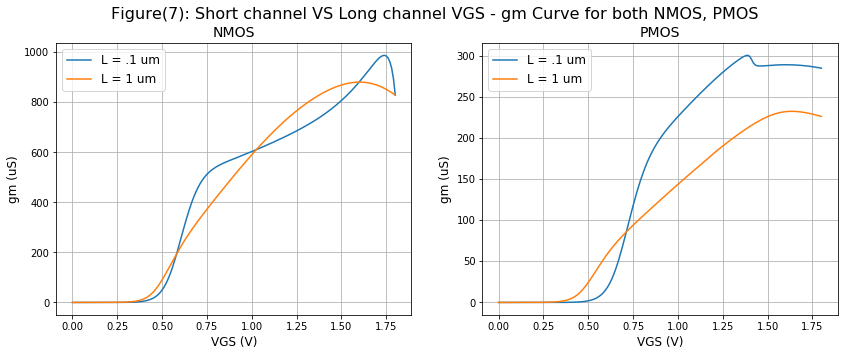

In [15]:
fig7, ax7 = plt.subplots(1, 2)
fig7.set_size_inches((14,5))
fig7.suptitle('Figure(7): Short channel VS Long channel VGS - gm Curve for both NMOS, PMOS', fontsize=16)

## Upper plot 
ax7[0].plot(ShortChannel.VGS,ShortChannel.gm_NMOS / 1e-6\
            ,LongChannel.VGS, LongChannel.gm_NMOS /1e-6);
ax7[0].set_title('NMOS',fontsize=14)
ax7[0].grid()

ax7[0].legend(['L = .1 um','L = 1 um '], fontsize=12)
ax7[0].set_xlabel('VGS (V)',fontsize=12);
ax7[0].set_ylabel('gm (uS)',fontsize = 12);

## Lower plot


ax7[1].plot(ShortChannel.VGS, ShortChannel.gm_PMOS/ 1e-6\
            ,LongChannel.VGS, LongChannel.gm_PMOS/ 1e-6);
ax7[1].set_title('PMOS',fontsize=14)
ax7[1].grid()

ax7[1].legend(['L = .1 um','L = 1 um '], fontsize=12)
ax7[1].set_xlabel('VGS (V)',fontsize=12);
ax7[1].set_ylabel('gm (uS)',fontsize = 12);

From figure 7 , 𝑔𝑚 increase linearly in case of long channel for both NMOS, PMOS becasue Mosfet in pinch-off saturation resulting in quadratic relationship between ID, VGS. Taking the first derivative yielding a linear transconductance in this case. In short channel device NMOS exihibits velocity saturation effect resulting in linearizing current against VGS which yield constant transconductance against VGS.